In [2]:
N = (15 + 4 ) % 5 + 1
print(N)

5


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'NationalNames.csv'

df = pd.read_csv(file_path)

#2 Вивести останні 8 рядків набору даних.
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [56]:
#4 Отримайте загальну інформацію про дані у наборі даних.
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [10]:
#6 Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі
unique_names_count = df.groupby('Gender')['Name'].nunique()

unique_names_df = unique_names_count.reset_index(name='Names')

unique_names_df


,Gender,Names
0,F,64911
1,M,39199


In [12]:
#7 Знайдіть 5 найпопулярніших чоловічих імен у 2010 роц
male_names_2010 = df[(df['Gender'] == 'M') & (df['Year'] == 2010)]

top_5_male_names_2010 = male_names_2010.sort_values(by='Count', ascending=False).head(5)

top_5_male_names_2010[['Name', 'Count','Year', 'Gender']]

,Name,Count,Year,Gender
1677392,Jacob,22082,2010,M
1677393,Ethan,17985,2010,M
1677394,Michael,17308,2010,M
1677395,Jayden,17152,2010,M
1677396,William,17030,2010,M


In [61]:
#9 Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
min_count = df['Count'].min()

min_count_rows = df[df['Count'] == min_count]

min_count_rows_count = min_count_rows.shape[0]

print(min_count_rows_count)


254615


In [16]:
#10 Підрахуйте кількість унікальних імен у кожному році
unique_names_per_year = df.groupby('Year')['Name'].nunique().reset_index(name='Names')

unique_names_per_year


,Year,Names
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


In [66]:
#15
births_per_year = df.groupby('Year')['Count'].sum().reset_index(name='Total Births')

births_per_year


,Year,Total Births
0,1880,201484
1,1881,192699
2,1882,221538
3,1883,216950
4,1884,243467
...,...,...
130,2010,3686589
131,2011,3646730
132,2012,3643336
133,2013,3626802


In [67]:
#16
births_per_year = df.groupby('Year')['Count'].sum().reset_index(name='Total Births')

max_births_year = births_per_year['Year'][births_per_year['Total Births'].idxmax()]

print(max_births_year)


1957


In [69]:
#17
births_by_gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

births_by_gender_per_year


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [71]:
#18
births_by_gender_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack(fill_value=0)

years_with_more_girls = (births_by_gender_per_year['F'] > births_by_gender_per_year['M']).sum()

print(years_with_more_girls)


54


In [73]:
#20
gender_counts = df.groupby('Name')['Gender'].nunique()

gender_neutral_names_count = (gender_counts[gender_counts == 2]).count()

print(gender_neutral_names_count)


10221


In [18]:
#21
count_barbara_boys = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()

print(count_barbara_boys)


4139


In [20]:
#22
years_count = df['Year'].nunique()

print(f"Спостереження проводилось {years_count} років")


Спостереження проводилось 135 років


In [35]:
#24
name_counts = df.groupby("Name")["Count"].sum().reset_index()

threshold = 161
unpopular_names = name_counts[name_counts["Count"] < threshold]

most_popular_of_unpopular = unpopular_names.loc[unpopular_names["Count"].idxmax()]

print("Найпопулярніше серед непопулярних імен:", most_popular_of_unpopular["Name"])
print("Кількість використань:", most_popular_of_unpopular["Count"])

Найпопулярніше серед непопулярних імен: Adriyana
Кількість використань: 160


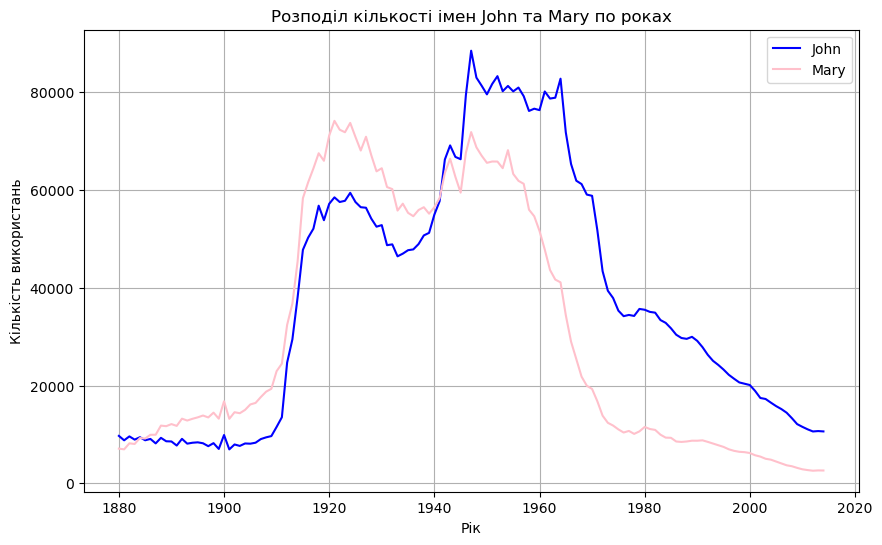

In [24]:
#25
filtered_df = df[df["Name"].isin(["John", "Mary"])]

name_year_counts = filtered_df.groupby(["Year", "Name"])["Count"].sum().unstack()

plt.figure(figsize=(10, 6))

plt.plot(name_year_counts.index, name_year_counts["John"], label="John", color='blue')

plt.plot(name_year_counts.index, name_year_counts["Mary"], label="Mary", color='pink')

plt.title("Розподіл кількості імен John та Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість використань")
plt.legend()
plt.grid(True)

plt.show()

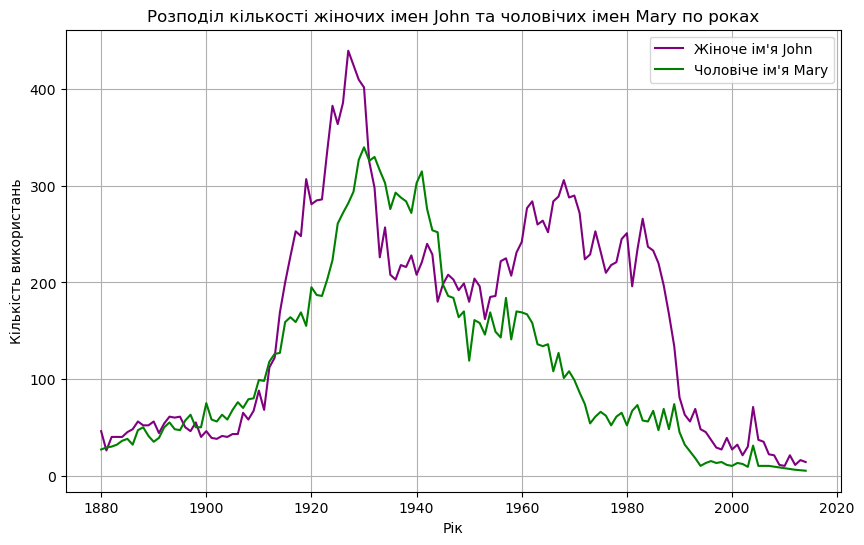

In [26]:
#26
female_john_df = df[(df["Name"] == "John") & (df["Gender"] == "F")]
male_mary_df = df[(df["Name"] == "Mary") & (df["Gender"] == "M")]

female_john_counts = female_john_df.groupby("Year")["Count"].sum()
male_mary_counts = male_mary_df.groupby("Year")["Count"].sum()

plt.figure(figsize=(10, 6))

plt.plot(female_john_counts.index, female_john_counts, label="Жіноче ім'я John", color='purple')

plt.plot(male_mary_counts.index, male_mary_counts, label="Чоловіче ім'я Mary", color='green')

plt.title("Розподіл кількості жіночих імен John та чоловічих імен Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість використань")
plt.legend()
plt.grid(True)

plt.show()

In [32]:
#27
most_popular_names_per_year = df.loc[df.groupby("Year")["Count"].idxmax()][["Year", "Name", "Count"]]

most_popular_names_per_year

,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
